In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from matplotlib.pyplot import figure
import math

data = pd.read_csv("https://raw.githubusercontent.com/Krishna-97/Data_Sets/main/2022_forbes_billionaires.csv")
print(data.head())

   Unnamed: 0  rank                       name networth  age        country  \
0           0     1                 Elon Musk    $219 B   50  United States   
1           1     2                Jeff Bezos    $171 B   58  United States   
2           2     3  Bernard Arnault & family    $158 B   73         France   
3           3     4                Bill Gates    $129 B   66  United States   
4           4     5            Warren Buffett    $118 B   91  United States   

               source                industry  
0       Tesla, SpaceX             Automotive   
1              Amazon             Technology   
2                LVMH       Fashion & Retail   
3           Microsoft             Technology   
4  Berkshire Hathaway  Finance & Investments   


In [0]:
print(data.isnull().sum())

Unnamed: 0    0
rank          0
name          0
networth      0
age           0
country       0
source        0
industry      0
dtype: int64


In [0]:
data = data.dropna()

In [0]:
# Convert string networth to float without effecting the original column
data['newnetworth'] = pd.to_numeric(data.networth.str.replace(r"[a-zA-Z\$]",''))

<command-2650735105764493>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['newnetworth'] = pd.to_numeric(data.networth.str.replace(r"[a-zA-Z\$]",''))


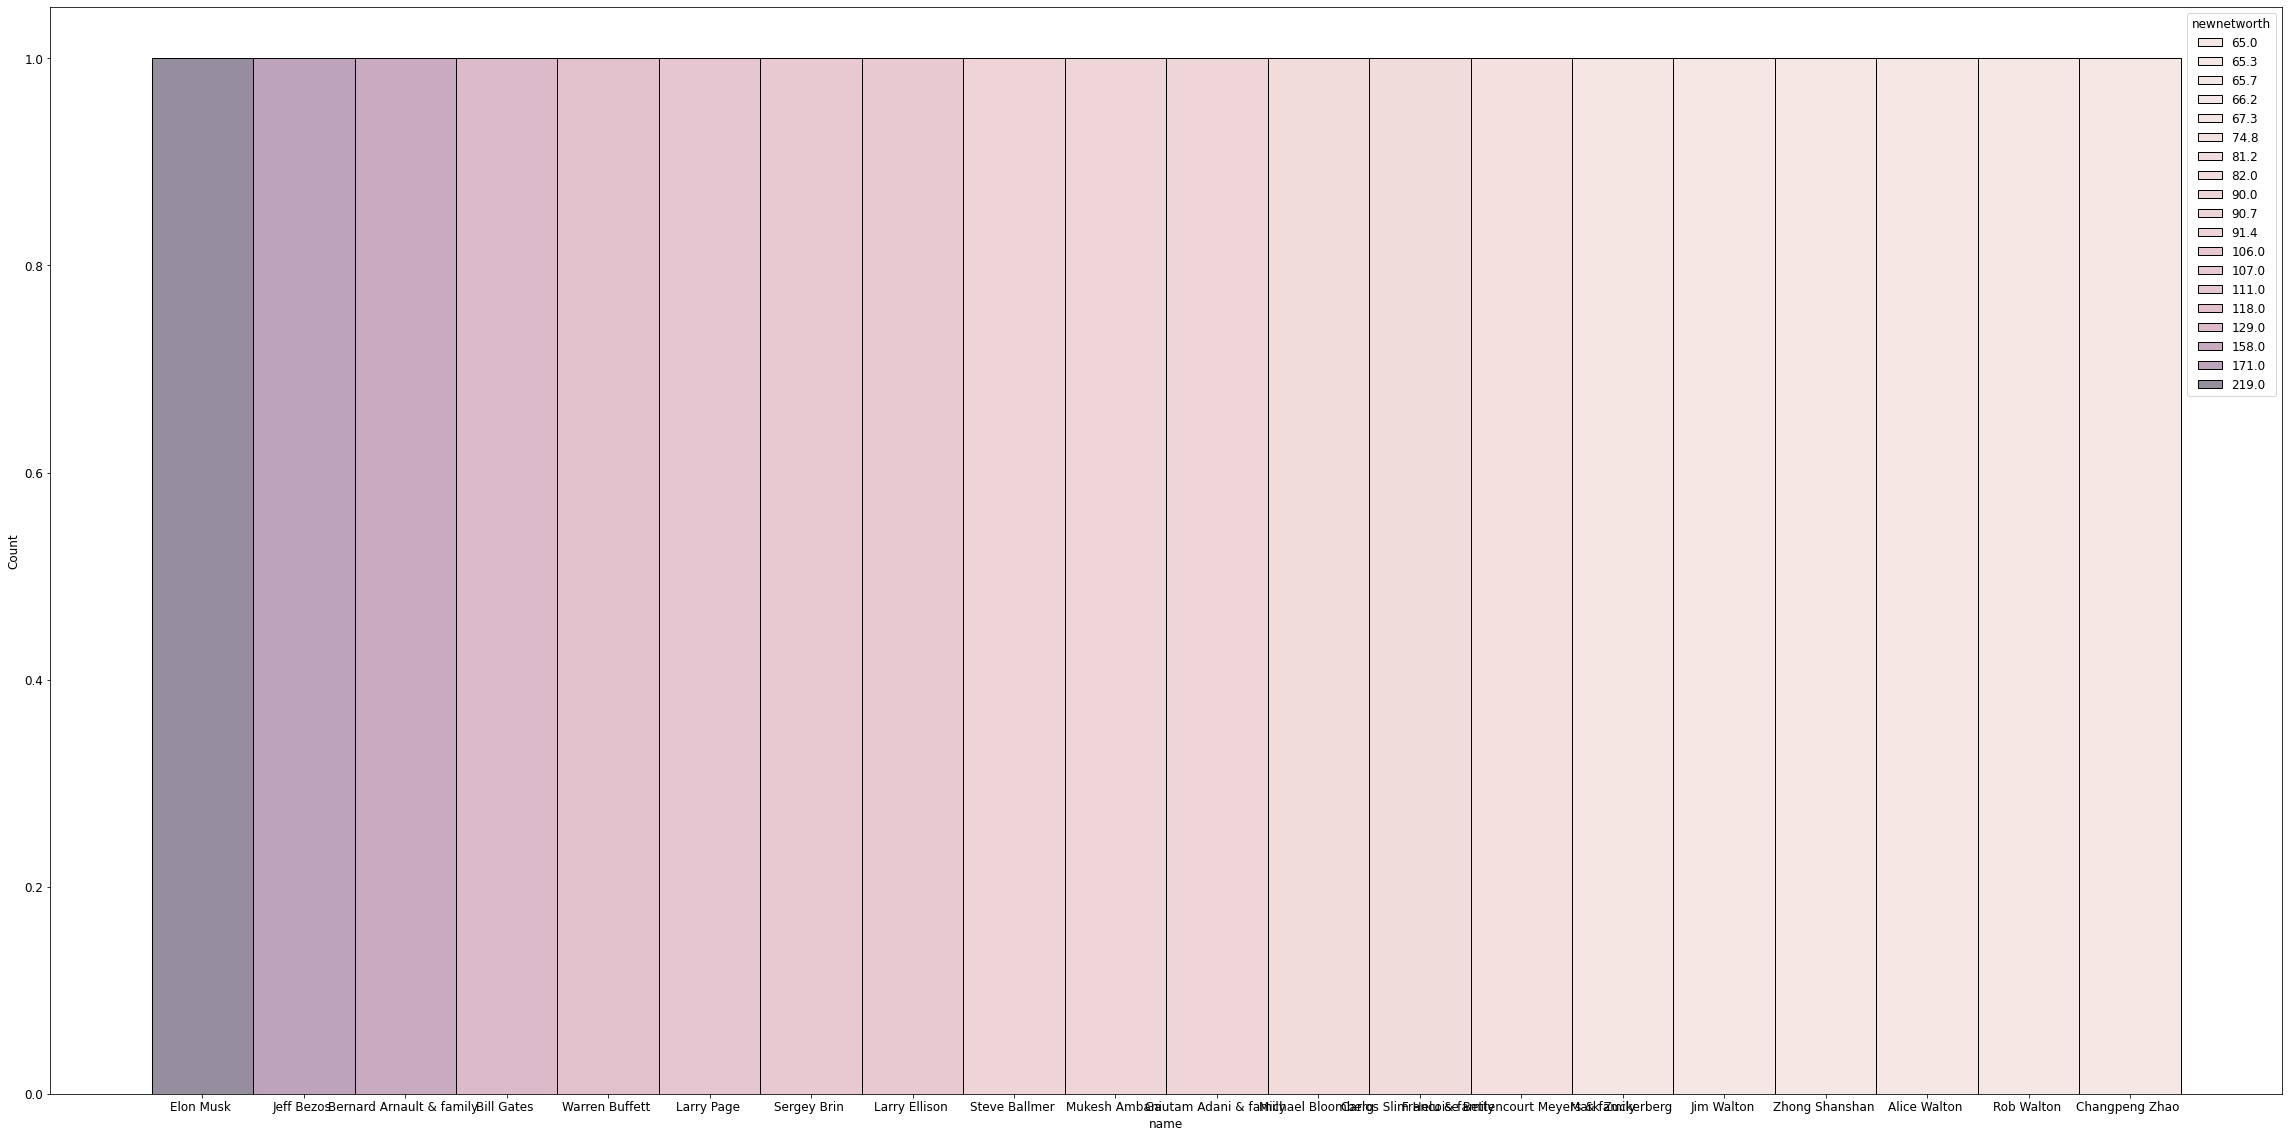

In [0]:
# Top 20 Billionaires based on thier networth 
df = data.sort_values(by = ["newnetworth"],ascending=0).head(20)
plt.figure(figsize = (40,20))
sns.histplot(x="name",hue="newnetworth",data=df)
plt.show()

In [0]:
# list of billionaires whose has Jeff
def get_person(data, name = ''):
    return data[data['name'].str.contains(name, regex=False)]
get_person(data, 'Jeff')

,Unnamed: 0,rank,name,networth,age,country,source,industry,newnetworth
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology,171.0
156,156,156,Jeff Yass,$12 B,63,United States,"trading, investments",Finance & Investments,12.0
316,316,316,Jeffery Hildebrand,$7.5 B,63,United States,oil,Energy,7.5
538,538,536,Jeff Greene,$5.1 B,67,United States,"real estate, investments",Real Estate,5.1
596,596,586,Jeff Skoll,$4.8 B,57,United States,eBay,Technology,4.8
864,864,851,Jeffrey Lurie,$3.5 B,70,United States,Philadelphia Eagles,Sports,3.5
893,893,883,Jeff T. Green,$3.4 B,45,United States,digital advertising,Media & Entertainment,3.4
1006,1006,984,Jeff Sutton,$3.1 B,62,United States,real estate,Real Estate,3.1
1142,1142,1096,Jeff Rothschild,$2.8 B,67,United States,Facebook,Technology,2.8
1330,1330,1292,Jeff Tangney,$2.4 B,49,United States,healthcare IT,Healthcare,2.4


In [0]:
# List of Billionaires whose country is india
def get_from_country(data, name = ''):
    return data[data['country'] == name]
get_from_country(data, 'India')

,Unnamed: 0,rank,name,networth,age,country,source,industry,newnetworth
9,9,10,Mukesh Ambani,$90.7 B,64,India,diversified,Diversified,90.7
10,10,11,Gautam Adani & family,$90 B,59,India,"infrastructure, commodities",Diversified,90.0
46,46,47,Shiv Nadar,$28.7 B,76,India,software services,Technology,28.7
56,56,56,Cyrus Poonawalla,$24.3 B,80,India,vaccines,Healthcare,24.3
80,80,81,Radhakishan Damani,$20 B,67,India,"retail, investments",Fashion & Retail,20.0
...,...,...,...,...,...,...,...,...,...
2539,2539,2448,Kavita Singhania,$1.1 B,60,India,cement,Manufacturing,1.1
2542,2542,2448,Ashok Soota,$1.1 B,79,India,software services,Technology,1.1
2544,2544,2448,Venu Srinivasan,$1.1 B,69,India,two-wheelers,Automotive,1.1
2551,2551,2448,Sunil Vachani,$1.1 B,53,India,electronics,Manufacturing,1.1


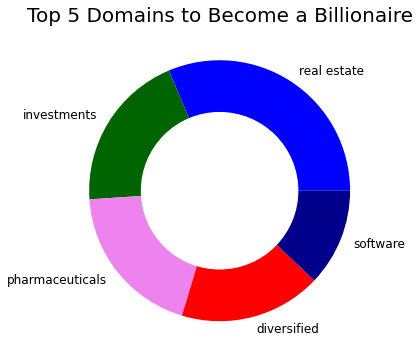

In [0]:
# Pie chart top 5 domians to become a billionaire
a = data["source"].value_counts().head()
index = a.index
sources = a.values
custom_colors = [ "blue","darkgreen","violet","red","darkblue"]
plt.figure(figsize=(6, 6))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Domains to Become a Billionaire", fontsize=20)
plt.show()

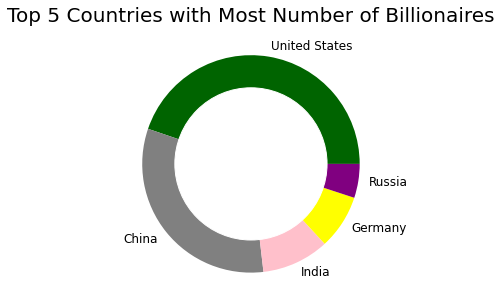

In [0]:
# Pie chart Top 5 Countries with Most Number of Billionaires
a = data["country"].value_counts().head()
index = a.index
Countries = a.values
custom_colors = ["darkgreen","grey","pink","yellow","purple"]
plt.figure(figsize=(5, 5))
plt.pie(Countries, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Countries with Most Number of Billionaires", fontsize=20)
plt.show()

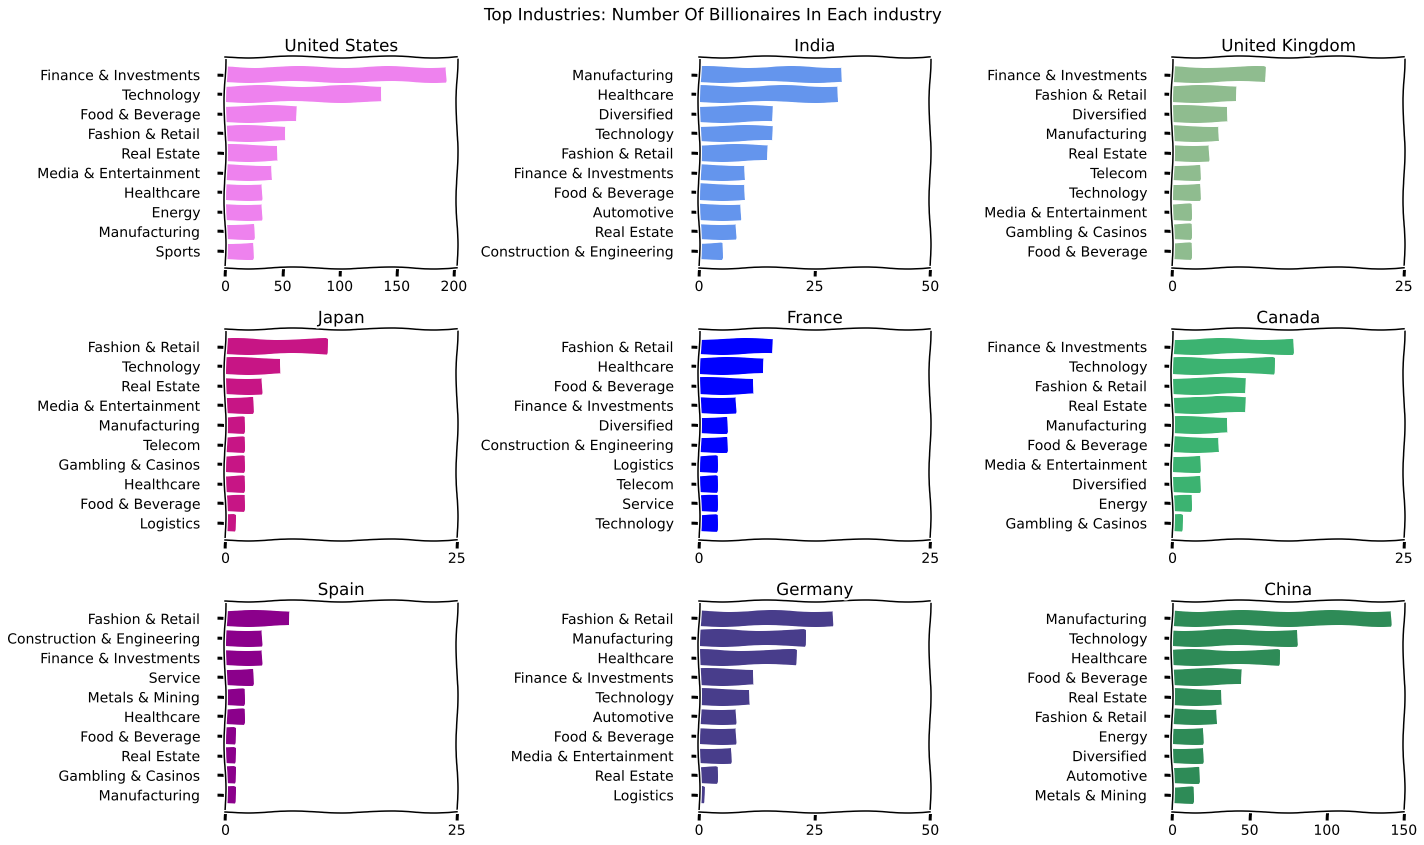

In [0]:
# Country wise comparision for Billiionaire from each industries

col = "industry"
colours = ["violet", "cornflowerblue", "darkseagreen", "mediumvioletred", "blue", "mediumseagreen", "darkmagenta", "darkslateblue", "seagreen"]
Countries_list = ["United States", "India", "United Kingdom", "Japan", "France", "Canada", "Spain", "Germany", "China"]

df = data.copy()

with plt.xkcd():
    figure(num=None, figsize=(20, 12)) 
    x=1
    for Country in Countries_list:
        df["from_country"] = df['country'].fillna("").apply(lambda x : 1 if Country.lower() in x.lower() else 0)
        small = df[df["from_country"] == 1]
        genre = ", ".join(small['industry'].fillna("")).split(", ")
        # change most_common here if you want more or less industries
        tags = Counter(genre).most_common(10)
        tags = [_ for _ in tags if "" != _[0]]
        labels, values = [_[0]+"  " for _ in tags][::-1], [_[1] for _ in tags][::-1]
        if max(values)>200:
            values_int = range(0, math.ceil(max(values)), 100)
        elif max(values)>100 and max(values)<=200:
            values_int = range(0, math.ceil(max(values))+50, 50)
        else:
            values_int = range(0, math.ceil(max(values))+25, 25)
        plt.subplot(3, 3, x)
        plt.barh(labels,values, color = colours[x-1])
        plt.xticks(values_int)
        plt.title(Country)
        x+=1
    plt.suptitle('Top Industries: Number Of Billionaires In Each industry')
    plt.tight_layout()
    plt.show()

In [0]:
# Industries Count of billionaires based on Each Industries
def count_values(data, value = ''):
    return data[value].value_counts()
industries = count_values(data, 'industry')
industries

Out[35]: Finance & Investments          386
Technology                     329
Manufacturing                  322
Fashion & Retail               246
Healthcare                     212
Food & Beverage                201
Real Estate                    189
Diversified                    178
Media & Entertainment           95
Energy                          93
Automotive                      69
Metals & Mining                 67
Service                         51
Construction & Engineering      43
Logistics                       35
Telecom                         35
Sports                          26
Gambling & Casinos              23
Name: industry, dtype: int64

In [0]:
column_filtering_one = ['name', 'networth', 'source', 'rank', 'industry']
column_filtering_two = ['name', 'networth', 'source', 'industry']
column_filtering_three = ['networth', 'source', 'industry']
column_filtering_country = ['name', 'networth', 'source', 'country']
def count_values(data, value = ''):
    return data[value].value_counts()

def net_worth_more_than(data, networth = 1):
    return data[data['newnetworth'] >= networth]

def get_people_multiple_sources(data):
    return data[data["source"].str.contains(",", regex=False)]

def get_from_industry(data, name = ''):
    return data[data['industry'] == name]

def get_industries_country(data, country="United States"):
    tmp = data[data['country'] == country]
    for i in tmp["industry"].unique():
        networth_sum = sum(tmp[tmp["industry"] == i]["newnetworth"])
        print(i,":", networth_sum, "billion")

def get_industry_networth(data):
    for item in data['industry'].unique():
        industry = get_from_industry(data, item)
        print(item, "networth: {:,}".format(float(sum(industry["newnetworth"]))), " billions")
        print("---")

def billionaires_in_industry(data, name = ''):
    return len(data[data['industry'] == name])

In [0]:
data

,Unnamed: 0,rank,name,networth,age,country,source,industry,newnetworth
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive,219.0
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology,171.0
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail,158.0
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology,129.0
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments,118.0
...,...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare,1.0
2596,2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail,1.0
2597,2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail,1.0
2598,2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail,1.0


In [0]:
# All sources counted (even multiple sources)
sources = count_values(data, "source")
# Convert string networth to float without effecting the original column
data['newnetworth'] = data.newnetworth

# All people with multiple sources
people_multiple_sources = get_people_multiple_sources(data)

# All people from <country>
from_india = get_from_country(data, 'India')
from_us = get_from_country(data, 'United States')

# All people from <country> with multiple sources

from_india_multiple_sources = get_people_multiple_sources(from_india)
from_us_multiple_sources = get_people_multiple_sources(from_us)

In [0]:
#List of Billioaires whose networth more than 2 billion and has multiple sources
print(net_worth_more_than(people_multiple_sources, 2)[column_filtering_two])

                         name networth                       source  \
0                  Elon Musk    $219 B                Tesla, SpaceX   
10     Gautam Adani & family     $90 B  infrastructure, commodities   
16            Zhong Shanshan   $65.7 B   beverages, pharmaceuticals   
35          Giovanni Ferrero   $36.2 B          Nutella, chocolates   
39             Len Blavatnik   $32.5 B             music, chemicals   
...                       ...      ...                          ...   
1553          Linda Pritzker      $2 B          hotels, investments   
1557             Phil Ruffin      $2 B         casinos, real estate   
1564  Alexander Skorobogatko      $2 B         real estate, airport   
1570            Wenbiao Wang      $2 B     natural gas, fertilizers   
1571              Kanye West      $2 B              music, sneakers   

               industry  
0           Automotive   
10         Diversified   
16     Food & Beverage   
35     Food & Beverage   
39         Divers

In [0]:
#List of Billionaires from us whose netwoth greaterthan 20 Billion
net_worth_more_than(from_us, 20)[column_filtering_country]

,name,networth,source,country
0,Elon Musk,219.0,"Tesla, SpaceX",United States
1,Jeff Bezos,171.0,Amazon,United States
3,Bill Gates,129.0,Microsoft,United States
4,Warren Buffett,118.0,Berkshire Hathaway,United States
5,Larry Page,111.0,Google,United States
6,Sergey Brin,107.0,Google,United States
7,Larry Ellison,106.0,software,United States
8,Steve Ballmer,91.4,Microsoft,United States
11,Michael Bloomberg,82.0,Bloomberg LP,United States
14,Mark Zuckerberg,67.3,Facebook,United States


In [0]:
#List of Industries wise networth of billionaires whose country is india
from_India = data[data['country'] == "India"]
get_industry_networth(from_India)

Diversified  networth: 232.69999999999996  billions
---
Technology  networth: 70.8  billions
---
Healthcare  networth: 110.89999999999999  billions
---
Fashion & Retail  networth: 57.399999999999984  billions
---
Metals & Mining  networth: 39.599999999999994  billions
---
Finance & Investments  networth: 34.1  billions
---
Telecom  networth: 13.9  billions
---
Real Estate  networth: 26.6  billions
---
Automotive  networth: 28.200000000000006  billions
---
Manufacturing  networth: 79.2  billions
---
Food & Beverage  networth: 26.1  billions
---
Service  networth: 9.6  billions
---
Construction & Engineering  networth: 9.600000000000001  billions
---
Media & Entertainment  networth: 2.4  billions
---
Energy  networth: 2.2  billions
---
Logistics  networth: 1.5  billions
---


In [0]:

#List of percentage share of each industries and lowest, highest and mean values of age and rank based on each industry.

total_billions_all = np.sum(data["newnetworth"])


for item in data["industry"].unique():
    industry_bilionaires = data[data["industry"]==item][["name", "newnetworth", "country", "source", "rank", "age"]]
    
    total_billions_industry = np.sum(industry_bilionaires["newnetworth"])
    
    lowest_age_industry = np.min(industry_bilionaires["age"])
    highest_age_industry = np.max(industry_bilionaires["age"])
    mean_age_industry = round(np.mean(industry_bilionaires["age"]))
    
    lowest_rank_industry = np.max(industry_bilionaires["rank"])
    highest_rank_industry = np.min(industry_bilionaires["rank"])
    mean_rank_industry = round(np.mean(industry_bilionaires["rank"]))
    
    print(item, str(round((total_billions_industry/total_billions_all)*100, 2))+"%")
    print(item, " lowest age ", lowest_age_industry)
    print(item, " highest age ", highest_age_industry)
    print(item, " mean age ", mean_age_industry)

    print(item, " highest rank ", highest_rank_industry)
    print(item, " lowest rank ", lowest_rank_industry)
    print(item, " mean rank ", mean_rank_industry)
    
    print("")

Automotive  4.61%
Automotive   lowest age  27
Automotive   highest age  91
Automotive   mean age  63
Automotive   highest rank  1
Automotive   lowest rank  2448
Automotive   mean rank  1169

Technology  17.16%
Technology   lowest age  27
Technology   highest age  93
Technology   mean age  56
Technology   highest rank  2
Technology   lowest rank  2578
Technology   mean rank  1231

Fashion & Retail  12.76%
Fashion & Retail   lowest age  19
Fashion & Retail   highest age  97
Fashion & Retail   mean age  67
Fashion & Retail   highest rank  3
Fashion & Retail   lowest rank  2578
Fashion & Retail   mean rank  1211

Finance & Investments  13.72%
Finance & Investments   lowest age  25
Finance & Investments   highest age  100
Finance & Investments   mean age  65
Finance & Investments   highest rank  5
Finance & Investments   lowest rank  2578
Finance & Investments   mean rank  1226

Diversified  7.43%
Diversified   lowest age  25
Diversified   highest age  98
Diversified   mean age  68
Diversif

In [0]:
print(data.groupby("industry")["newnetworth"].mean().sort_values(ascending=False))

industry
Automotive                     8.443478
Technology                     6.590881
Fashion & Retail               6.557724
Telecom                        5.860000
Metals & Mining                5.816418
Logistics                      5.605714
Diversified                    5.278090
Media & Entertainment          5.195789
Gambling & Casinos             4.678261
Food & Beverage                4.643532
Finance & Investments          4.493005
Energy                         4.250538
Sports                         3.753846
Service                        3.649020
Real Estate                    3.628571
Manufacturing                  3.353416
Healthcare                     3.343868
Construction & Engineering     2.811628
Name: newnetworth, dtype: float64


In [0]:
pip install -U kaleido

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
df1 = data['source'].value_counts().reset_index()

fig = px.bar(df1, x = df1['index'], y = df1['source'], color =df1['source'],
             color_continuous_scale ='sunset',
             labels = {"index":"source","source":"count"})

fig.update_xaxes(tickangle=45, tickfont=dict(color='Indigo'))

fig.update_layout(title = 'Top industries of billionaires who built their own fortune',
                  title_x = 0.5,
                  title_font = dict(size = 20, family = 'Balto', color = 'Indigo'),
                  xaxis = dict(title = 'INDUSTRY'),
                  yaxis = dict(title = 'COUNT')
                 
                 )
fig.show()
fig.write_image("./fig1.png",scale = 50, width = 1500, height = 1050,engine = 'kaleido')

In [0]:
df1 = data['age'].value_counts().reset_index()

fig = px.bar(df1, x = df1['index'], y = df1['age'], color =df1['age'],
             color_continuous_scale ='rdbu',
             labels = {"index":"source","source":"count"})

fig.update_xaxes(tickangle=0, tickfont=dict(color='Indigo'))

fig.update_layout(title = 'Age of billionaires',
                  title_x = 0.5,
                  title_font = dict(size = 22, family = 'Balto', color = 'Indigo'),
                  xaxis = dict(title = 'AGE'),
                  yaxis = dict(title = 'COUNT')
                 
                 )
fig.show()
fig.write_image("./fig3.png",scale = 3, width = 800, height = 450, engine = 'kaleido')